### Introduction to Neural network classification with Tensorflow
In this notebook we are going to learn how to write neural networks for classification.

A classification is where you try to classify something as one thing or other.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_sample = 1000

# Create circles
X, y = make_circles(n_sample, noise=0.03,random_state=42)

In [2]:
# check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

our data is little hard to understamd right now.. let's visualize it

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0],"X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


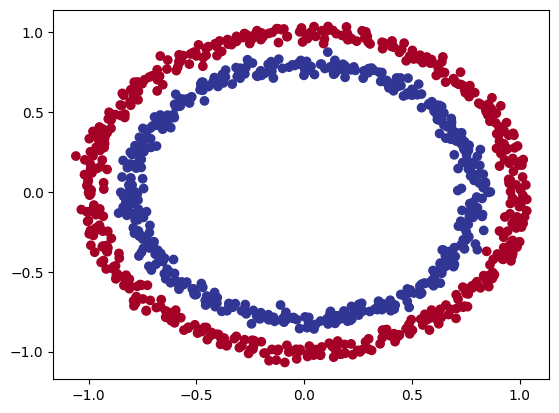

In [5]:
# Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.RdYlBu)

### Input and output shape

In [6]:
# Check the shapes of your features and labels
X.shape, y.shape

((1000, 2), (1000,))

### Steps in modelling
The steps in modelling with tensorflow are typically:
* Create or import model
* Compile the model
* Fit the model
* Evaluate the model
* Tweak
* Evaluate

In [7]:
import tensorflow as tf
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 810us/step - loss: 5.4247 - accuracy: 0.4490
Epoch 2/5
32/32 [==============================] - 0s 710us/step - loss: 5.2213 - accuracy: 0.4680
Epoch 3/5
32/32 [==============================] - 0s 740us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 677us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 680us/step - loss: 7.7125 - accuracy: 0.5000


In [8]:
# Let's try and improve our model by training for longer period
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 676us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy.... it's performing as if it's guessing.
So let's step things up a notch and add an extra layer.

In [9]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 677us/step - loss: 0.6933 - accuracy: 0.5000


[0.6932703256607056, 0.5]

### Improving our model
Let's look into our bag of tricks to see how we can improve our model.

* Create a model - We might add more layers or increase the number of neurons within a layer.
* Compiling a model - We might choose different optimization function such as Adam instead of SGD.
* Fitting a model - Perhaps we might fit our model for more epochs(leave it training for longer periods).

In [10]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 710us/step - loss: 0.6948 - accuracy: 0.5010


[0.6948379278182983, 0.5009999871253967]

### To visualize our model's prediction, let's create a function `plo_decision_boundary()` this function will:

* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the differnet X values.
* Make predictions across the meshgrid.
* Plot the predictions as well as a line between zones (where each unique class falls)

In [11]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)

    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions

    y_pred = model.predict(x_in)

    # Check for multiclass
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")

        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.around(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 564us/step
doing binary classification


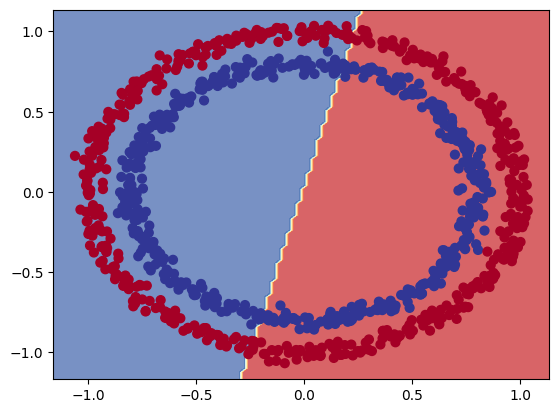

In [12]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

### The missing piece Non-linearity

In [15]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100, verbose=2)
model_4.evaluate(X, y)

Epoch 1/100
32/32 - 0s - loss: 5.9184 - accuracy: 0.4820 - 326ms/epoch - 10ms/step
Epoch 2/100
32/32 - 0s - loss: 5.9008 - accuracy: 0.4840 - 21ms/epoch - 656us/step
Epoch 3/100
32/32 - 0s - loss: 5.8996 - accuracy: 0.4850 - 20ms/epoch - 625us/step
Epoch 4/100
32/32 - 0s - loss: 5.8980 - accuracy: 0.4850 - 21ms/epoch - 656us/step
Epoch 5/100
32/32 - 0s - loss: 5.8965 - accuracy: 0.4850 - 20ms/epoch - 638us/step
Epoch 6/100
32/32 - 0s - loss: 5.8951 - accuracy: 0.4850 - 22ms/epoch - 675us/step
Epoch 7/100
32/32 - 0s - loss: 5.8720 - accuracy: 0.4860 - 21ms/epoch - 656us/step
Epoch 8/100
32/32 - 0s - loss: 5.8091 - accuracy: 0.4820 - 21ms/epoch - 656us/step
Epoch 9/100
32/32 - 0s - loss: 5.8142 - accuracy: 0.4820 - 21ms/epoch - 643us/step
Epoch 10/100
32/32 - 0s - loss: 5.8135 - accuracy: 0.4820 - 20ms/epoch - 625us/step
Epoch 11/100
32/32 - 0s - loss: 5.8130 - accuracy: 0.4820 - 21ms/epoch - 656us/step
Epoch 12/100
32/32 - 0s - loss: 5.8126 - accuracy: 0.4820 - 21ms/epoch - 656us/step
E

[4.651836395263672, 0.4690000116825104]

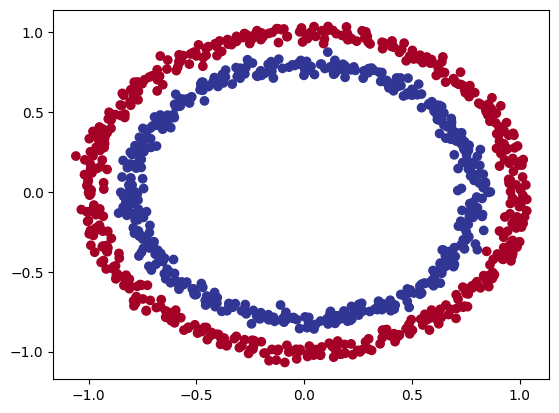

In [16]:
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 576us/step
doing binary classification


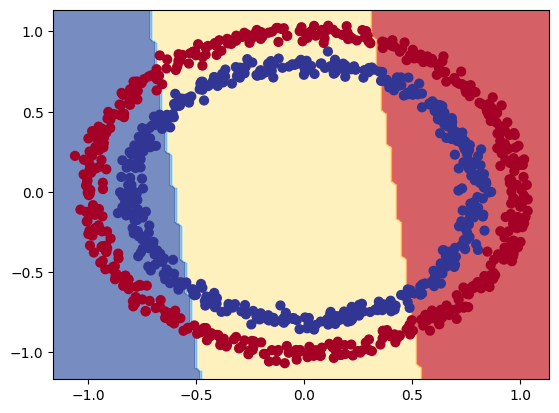

In [19]:
# Check the decision boundary for our latest boundary
plot_decision_boundary(model=model_4,X=X, y=y)